# **Business Understanding**


## **Business Objective**

Proyek ini bertujuan untuk menganalisis hal hal apa saja yang dapat memengaruhi gaji dari Profesi Data Science, seperti dari Pengalaman kerja, Besar perusahaan dan Jenis pekerjaan. Dengan data ini seseorang dapat menentukan berapa gaji yang bisa dia pakai sebagai patokan jika mendapat pertanyaan "Berapa estimasi gaji yang kamu inginkan" bukan hanya itu perusahaan juga mengetahui berapa gaji yang cocok untuk diterapkan kepada calon pekerja sesuai bidangnya.

## **Assess Situation**

Pada saat ini Industri Data Science sedang berkembang sangat pesat hal yang mendasari analisis ini adalah seringnya terjadinya ketimpangan dari Gaji atau Pendapatan dari berdasarkan lokasi dan perusahaan contohnya gaji di Indonesia hanya 5 juta perbulan dan di amerika bisa 200 juta per bulannya. jadi analisis ini bisa membantu Data Science dan Perusahaan membuat keputusan yang tepat.

## **Data Mining Goals**

Mengidentifikasi melalui Pengalaman Kerja, Bidang, Besar Perusahaan dan Gaji yang terdapat pada dataset dan dianalisis, bisa membantu untuk mengelompokan Berapa *Range* Gaji yang seharusnya didapatkan oleh Data Science.

## **Project Plan**

Project ini akan dimulai dengan cara Menganalisis setiap data yang ada didataset dengan membuang data tidak lengkap, lalu setelah itu dikelompokkan setiap jenis dari bidangnya yang mencakup pengalaman kerja dan sejenisnya, lalu data dibuat berbentuk table yang bisa diubah sesuai dengan pengelompokan agaar dapat digunakan dengan mudah.


# **Library**

In [2]:
import pandas as pd

# Membaca Table
saya mendapat data ini dari
Kaggle : https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries/data
yang berasal dari "Salaries of jobs in the Data Science domain"


In [3]:
df = pd.read_csv("/content/ds_salaries.csv")

df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


**Tipe Data**

In [ ]:
df.dtypes

,0
Unnamed: 0,int64
work_year,int64
experience_level,object
employment_type,object
job_title,object
salary,int64
salary_currency,object
salary_in_usd,int64
employee_residence,object
remote_ratio,int64


**Deskripsi Data**

In [ ]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


# Data Cleaning

### Missing Value

Pada dataset yang saya pilih, tidak ada data yang hilang pada setiap column

In [ ]:
print((df.isna().sum() / len(df)) * 100)

Unnamed: 0            0.0
work_year             0.0
experience_level      0.0
employment_type       0.0
job_title             0.0
salary                0.0
salary_currency       0.0
salary_in_usd         0.0
employee_residence    0.0
remote_ratio          0.0
company_location      0.0
company_size          0.0
dtype: float64


### Duplicated Values

pada dataset ini tidak terdapat data yang double atau terduplikat

In [ ]:
df[df.duplicated()]

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size


### Outliers

terdapat outliers yang kecil pada salary dan usd salary yang sebenarnya tidak harus diperbaikin tetapi tetap saya.

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Unnamed: 0,0.000000
work_year,0.000000
salary,7.248764
salary_in_usd,1.647446
remote_ratio,0.000000


In [ ]:
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [ ]:
columns_to_impute = ["salary", "salary_in_usd"]

for col in columns_to_impute:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menggunakan .loc[] agar tidak muncul SettingWithCopyWarning
    df.loc[:, col] = df[col].clip(lower=lower_bound, upper=upper_bound)

In [ ]:
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


Melakukan pengecekan ulang

In [ ]:
results = []  # Inisialisasi list kosong

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers) / len(df)) * 100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})  # Tidak error lagi

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)


Kolom,Persentase Outliers
Unnamed: 0,0.0
work_year,0.0
salary,0.0
salary_in_usd,0.0
remote_ratio,0.0


### Incosistent Value
tidak terdapat value yang tidak konsisten didalam sini

In [ ]:
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


# **Construct Data**
didalam kontruksi data saya menambahkan berapa tahun pengalaman dari seseorang untuk memudahkan jalannya studi kasus

In [5]:
experience_mapping = {"EN": 0, "MI": 3, "SE": 7, "EX": 12}
df["years_experience"] = df["experience_level"].map(experience_mapping)

In [12]:
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,years_experience
0,0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L,3
1,1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S,7
2,2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M,7
3,3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S,3
4,4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L,7
...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,US,100,US,M,7
603,603,2022,SE,FT,Data Engineer,126000,US,100,US,M,7
604,604,2022,SE,FT,Data Analyst,129000,US,0,US,M,7
605,605,2022,SE,FT,Data Analyst,150000,US,100,US,M,7


# Data Reduction
dalam data reduksi saya menghapus pendapatan dan mata uang pendapatan untuk menyederhanakan dataset


In [4]:
df = df.drop(['salary', 'salary_currency'], axis=1)

In [13]:
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,years_experience
0,0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L,3
1,1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S,7
2,2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M,7
3,3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S,3
4,4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L,7
...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,US,100,US,M,7
603,603,2022,SE,FT,Data Engineer,126000,US,100,US,M,7
604,604,2022,SE,FT,Data Analyst,129000,US,0,US,M,7
605,605,2022,SE,FT,Data Analyst,150000,US,100,US,M,7


### Library

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi Data

### Rata-rata Gaji di 10 Negara Teratas

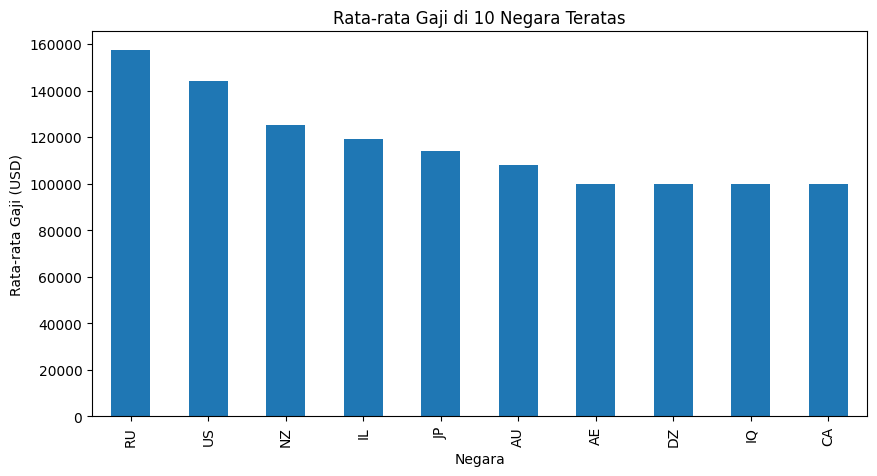

In [14]:
avg_salary_country = df.groupby("company_location")["salary_in_usd"].mean().sort_values(ascending=False).head(10)
avg_salary_country.plot(kind="bar", figsize=(10, 5))
plt.title("Rata-rata Gaji di 10 Negara Teratas")
plt.xlabel("Negara")
plt.ylabel("Rata-rata Gaji (USD)")
plt.show()


dari Visualisasi diatas kita bisa melihat bahwa gaji dari Data Scientist bisa dipengaruhi dari tempat dimana kita berada seperti contohnya Rusia dan Canada,ini bisa menjadi pertimbangan untuk data scientist dalam memilih tempat dimana dia ingin kerja

### Gaji Berdasarkan Tingkat Pengalaman

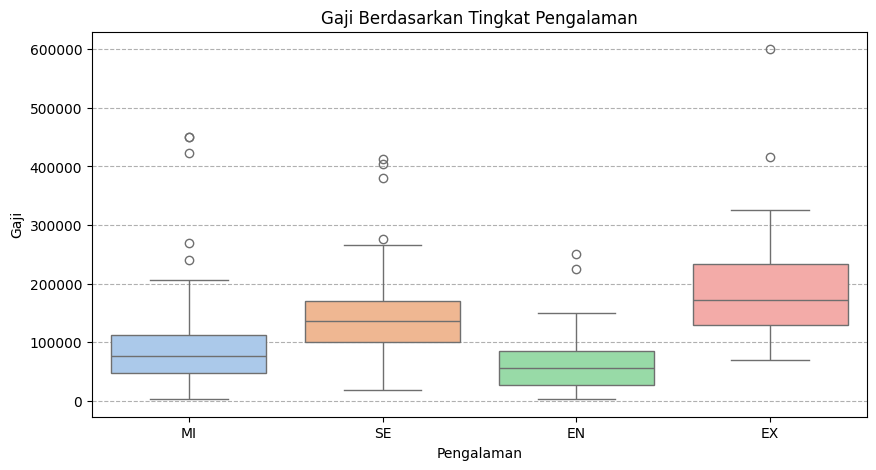

In [13]:
# Boxplot (Seaborn)
plt.figure(figsize=(10, 5))
sns.boxplot(x='experience_level', y='salary_in_usd',hue="experience_level", data=df, palette='pastel')
plt.title('Gaji Berdasarkan Tingkat Pengalaman')
plt.xlabel('Pengalaman')
plt.ylabel('Gaji')
plt.grid(axis="y", linestyle="--", alpha=1)
plt.show()


Analisis ini menunjukkan bahwa pengalaman memiliki dampak signifikan terhadap gaji, seperti EX (Executive-Level) dan SE (Senior-Level) memiliki rata rata gaji lebih tinggi dari EN (Entry Level) dan MI (Mid Level)

### Gaji Berdasarkan Ukuran Perusahaan

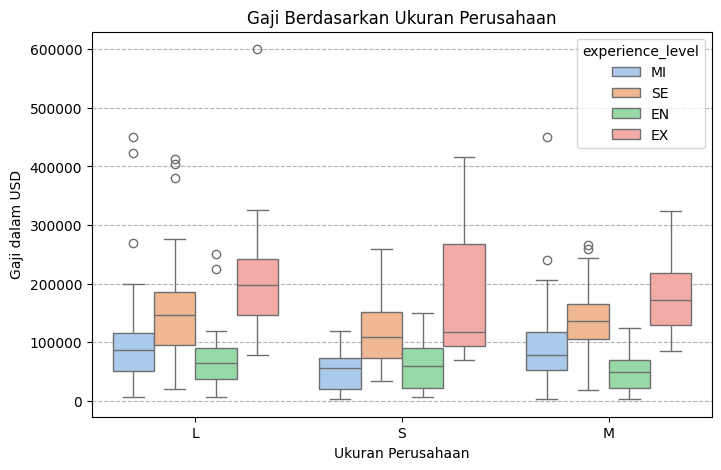

In [20]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="company_size", y="salary_in_usd",hue="experience_level", data=df, palette="pastel")
plt.title("Gaji Berdasarkan Ukuran Perusahaan")
plt.xlabel("Ukuran Perusahaan")
plt.ylabel("Gaji dalam USD")
plt.grid(axis="y", linestyle="--", alpha=1)
plt.show()

Pada analisis ini bisa dilihat bahwa  Perusahaan Besar Cenderung Membayar Gaji Lebih Tinggi sementara perusahaan kecil dan menengah (S & M) memiliki gaji yang lebih rendah

### Perbandingan Gaji Berdasarkan Jenis Pekerjaan (Top 10)

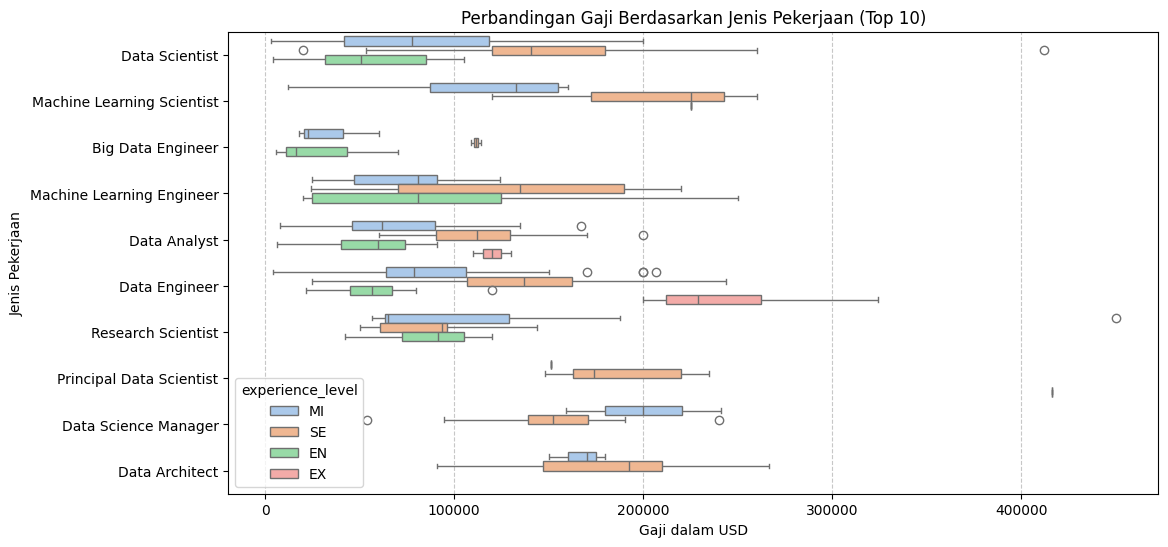

In [25]:
# Memilih 10 jenis pekerjaan dengan jumlah data terbanyak
top_jobs = df["job_title"].value_counts().nlargest(10).index
df_top_jobs = df[df["job_title"].isin(top_jobs)]

# Membuat boxplot perbandingan gaji berdasarkan jenis pekerjaan
plt.figure(figsize=(12, 6))
sns.boxplot(x="salary_in_usd", y="job_title", hue="experience_level", data=df_top_jobs, palette="pastel")

# Menambahkan judul dan label
plt.title("Perbandingan Gaji Berdasarkan Jenis Pekerjaan (Top 10)")
plt.xlabel("Gaji dalam USD")
plt.ylabel("Jenis Pekerjaan")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Menampilkan plot
plt.show()

Pada analisis diatas menunjukkan seberapa berpengaruh gaji pada posisi apa yang ingin Data Scientist pilih serta pengalaman tentu juga penting untk menilai berapa gaji yang harus diberikan

## **INSIGHT**

**Perbedaan Gaji Berdasarkan Lokasi =**
 Negara-negara maju seperti Amerika Serikat dan beberapa negara Eropa menawarkan gaji lebih tinggi dibandingkan negara berkembang. Ini menunjukkan bahwa faktor biaya hidup dan permintaan pasar tenaga kerja sangat berpengaruh terhadap gaji.

**Pengaruh Pengalaman terhadap Gaji =**
 Gaji meningkat secara signifikan dengan bertambahnya pengalaman, terutama di level Senior (SE) dan Executive (EX). Namun, ada variasi besar dalam kelompok yang sama, yang menunjukkan bahwa pengalaman saja tidak selalu cukup untuk menentukan gaji.

**Gaji Berdasarkan Ukuran Perusahaan =** Perusahaan besar menawarkan gaji yang lebih tinggi dibandingkan perusahaan kecil dan menengah, terutama bagi pekerja dengan tingkat pengalaman lebih tinggi. Namun, ada variasi gaji yang lebih besar di perusahaan besar, yang berarti ada peluang besar tetapi juga persaingan yang ketat.

**Gaji Berdasarkan Jenis Pekerjaan =** Beberapa pekerjaan memiliki rentang gaji yang lebih luas dibandingkan yang lain, yang berarti ada peluang besar bagi pekerja dengan keahlian khusus. Selain itu, outlier menunjukkan bahwa individu dengan keterampilan unik atau pengalaman spesifik dapat memperoleh gaji yang jauh lebih tinggi dibandingkan rata-rata.

## **TINDAKAN**

 - Bisa mempertimbangkan remote working untuk perusahaan di negara dengan gaji lebih tinggi agar bisa mendapatkan bayaran yang lebih kompetitif.
 - Jika ingin meningkatkan gaji, seorang data scientist harus mengembangkan skill dan pengalaman yang dapat membuat mereka lebih dari rekan orang sekitar.
 -  Jika mengincar gaji lebih tinggi, lebih baik menargetkan perusahaan besar.
 -  Bisa fokus pada keahlian yang sedang tren dan memiliki permintaan tinggi di pasar kerja untuk meningkatkan potensi gaji.